## 2. Data Preprocessing and Splitting

- 정규화(Normalization)
  * Sample late conversion
  * Bit-depth
  * Merge audio channels
- 특징 추출(Extract Features)
- 전처리(data를 label과 연결시키기)

**데이터 전처리와 특징 추출에 유용한 [Librosa](https://librosa.github.io/librosa/generated/librosa.core.load.html) 모듈을 계속 활용해 실습**

In [1]:
# 정규화(Normalization)
# sample rate 정규화
import librosa 
from scipy.io import wavfile as wav
import numpy as np

filename = './UrbanSound8K/audio/fold5/100852-0-0-0.wav' 

scipy_sample_rate, scipy_audio = wav.read(filename) 
librosa_audio, librosa_sample_rate = librosa.load(filename) 

print('Original sample rate:', scipy_sample_rate)  # 44.1KHz
print('Librosa sample rate:', librosa_sample_rate) # 22.05KHz

Original sample rate: 44100
Librosa sample rate: 22050


In [4]:
# bit-depth 정규화(-1 ~ 1 사이의 값으로 변환)
print('Original audio file min~max range:', np.min(scipy_audio), 'to', np.max(scipy_audio))
print('Librosa audio file min~max range:', np.min(librosa_audio), 'to', np.max(librosa_audio))

Original audio file min~max range: -23628 to 27507
Librosa audio file min~max range: -0.50266445 to 0.74983937


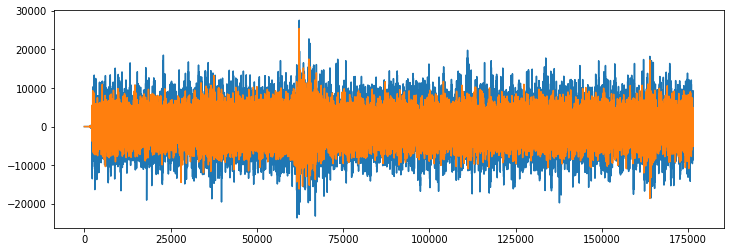

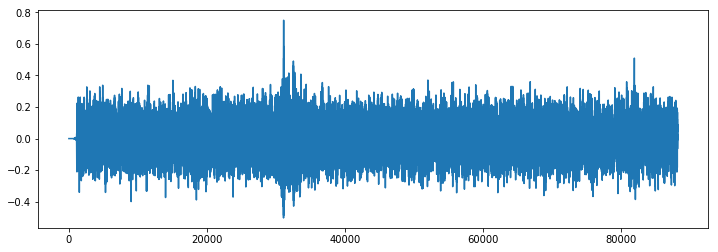

In [5]:
# audio channel 합치기
import matplotlib.pyplot as plt

# 원본 오디오 값 = 2채널(stereo)
plt.figure(figsize=(12, 4))
plt.plot(scipy_audio)

# Librosa를 활용해 하나로 합친 오디오 값 = 1채널(mono)
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio)

In [6]:
# 고려해야 할 다른 오디오 속성들
# 아직까지는 샘플 지속시간, 볼륨 레벨 등의 요소를 고려해야 하는지 확실하지 않음.
# 우선은 위 3가지만 정규화 후 실습을 진행하고, 추후 목표 지표의 유효성에 영향을 미칠 경우 다시 다룰 예정.

In [7]:
# 특징 추출(Extract Features)
# librosa의 mfcc() 함수를 사용해 해당 음성의 주파수 및 시간 특성을 모두 분석 -> classification 가능
mfccs = librosa.feature.mfcc(y=librosa_audio, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 173)


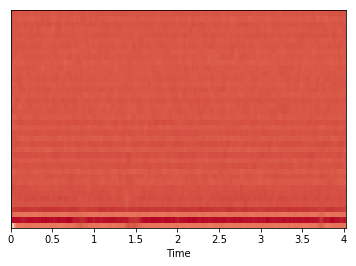

In [8]:
import librosa.display
librosa.display.specshow(mfccs, sr=librosa_sample_rate, x_axis='time')

In [9]:
# 모든 파일에서 mfcc 추출해서 label과 함께 pandas dataframe에 저장
def extract_features(file_name):
    try:
        audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
        mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
        mfccsscaled = np.mean(mfccs.T,axis=0)
        
    except Exception as e:
        print("Error encountered while parsing file: ", file)
        return None 
     
    return mfccsscaled

In [10]:
# urban sound 8732개 모든 파일의 특징 추출(mvcc 활용)
import pandas as pd
import os
import librosa

# Set the path to the full UrbanSound dataset 
fulldatasetpath = './UrbanSound8K/audio/'

metadata = pd.read_csv('./UrbanSound8K/metadata/UrbanSound8K.csv')

features = []

# Iterate through each sound file and extract the features 
for index, row in metadata.iterrows():
    
    file_name = os.path.join(os.path.abspath(fulldatasetpath),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    
    class_label = row["class_name"]
    data = extract_features(file_name)
    
    features.append([data, class_label])

# Convert into a Panda dataframe 
featuresdf = pd.DataFrame(features, columns=['feature','class_label'])

print('Finished feature extraction from ', len(featuresdf), ' files')

Finished feature extraction from  8732  files


In [11]:
print(data)

[-3.1593384e+02  9.5675888e+01 -3.8047771e+01  4.7500740e+01
 -7.3586011e+00  1.0455470e+01 -1.8447602e+00  1.8642925e+01
 -1.1789134e+01  7.2919989e+00 -7.3276453e+00  1.0661768e+01
 -1.4730462e+01  2.3039916e+00 -1.0813203e+01  5.0486927e+00
 -4.1896582e+00  1.9373505e+01  9.9117845e-01  4.5830026e+00
 -1.0203203e+01  1.4952717e+00 -8.8648920e+00  7.1252317e+00
  2.8728657e+00  1.5023614e+00 -1.3836694e+01  3.0785391e-01
  4.4619188e+00  2.4852619e+00 -1.1666129e+01 -3.5005755e+00
  4.0923738e+00  8.7135019e+00  1.1072224e+00  3.0423386e+00
  2.5794456e+00  5.7758075e-01 -1.1463765e+01 -5.9653540e+00]


In [14]:
featuresdf

,feature,class_label
0,"[-215.79301, 71.66612, -131.81377, -52.09133, ...",dog_bark
1,"[-424.68677, 110.56227, -54.14824, 62.01074, -...",children_playing
2,"[-459.56467, 122.80034, -47.92471, 53.265697, ...",children_playing
3,"[-414.55377, 102.896904, -36.66495, 54.18041, ...",children_playing
4,"[-447.397, 115.0954, -53.809113, 61.60859, 1.6...",children_playing
...,...,...
8727,"[-399.2257, 136.81902, -51.964222, 37.02399, -...",car_horn
8728,"[-346.72733, 87.48847, -46.265022, 52.748833, ...",car_horn
8729,"[-304.61316, 112.6199, -47.161945, 37.00349, -...",car_horn
8730,"[-344.71423, 126.75814, -56.17717, 36.070927, ...",car_horn


In [15]:
# data와 label들 변환하기
# sklearn.preprocessing 라이브러리의 LabelEncoder 모듈을 사용해 카테고리 텍스트 데이터를 기계가 알아들을 수 있도록 숫자 데이터로 인코딩
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

# features를 classification labels과 일치하게 numpy arrays로 변환
X = np.array(featuresdf.feature.tolist())
y = np.array(featuresdf.class_label.tolist())

# classification labels 인코딩
le = LabelEncoder()
yy = to_categorical(le.fit_transform(y))

In [26]:
print("features class_label")
print(y)

print()

print("Encoding features class_label")
print(yy)

features class_label
['dog_bark' 'children_playing' 'children_playing' ... 'car_horn'
 'car_horn' 'car_horn']

Encoding features class_label
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [33]:
# Split the dataset 
# sklearn.model_selection.train_test_split 모듈을 사용해 dataset을 트레이닝셋과 테스트셋으로 구분(분해, split)
# test dataset의 크기는 랜덥하게 20%의 비율로 구성
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(X, yy, test_size=0.2, random_state = 42)

In [34]:
# 전처리 완료된 data 저장하기
%store x_train 
%store x_test 
%store y_train 
%store y_test 
%store yy 
%store le

Stored 'x_train' (ndarray)
Stored 'x_test' (ndarray)
Stored 'y_train' (ndarray)
Stored 'y_test' (ndarray)
Stored 'yy' (ndarray)
Stored 'le' (LabelEncoder)
